Clasificación con datos imbalanceados --- 0:00 min
===

* Última modificación: Marzo 7, 2022 | YouTube

Importación de librerías
---

In [12]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf

tf.__version__

'2.8.0'

In [34]:
import matplotlib as mpl

mpl.rcParams["figure.figsize"] = (12, 10)
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

Preprocesamiento y exploración de datos
--

**Descarga**

In [2]:
import pandas as pd

raw_df = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
)
raw_df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [3]:
raw_df[
    ["Time", "V1", "V2", "V3", "V4", "V5", "V26", "V27", "V28", "Amount", "Class"]
].describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   9.604066e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    1.380247e+00  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.137433e+02 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -6.915971e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%   -5.433583e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    6.119264e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    3.480167e+01  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

**Conteo por clase**

In [4]:
raw_df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
import numpy as np

neg, pos = np.bincount(raw_df["Class"])
total = neg + pos
print(
    "Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n".format(
        total, pos, 100 * pos / total
    )
)

Examples:
    Total: 284807
    Positive: 492 (0.17% of total)



**Limpieza, particionamiento y normalización de los datos**

In [7]:
cleaned_df = raw_df.copy()
cleaned_df.pop("Time")

eps = 0.001
cleaned_df["Log Ammount"] = np.log(cleaned_df.pop("Amount") + eps)

In [8]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    cleaned_df,
    test_size=0.2,
)

train_df, val_df = train_test_split(
    train_df,
    test_size=0.2,
)

train_labels = np.array(train_df.pop("Class"))
bool_train_labels = train_labels != 0

val_labels = np.array(val_df.pop("Class"))
test_labels = np.array(test_df.pop("Class"))

train_features = np.array(train_df)
val_features = np.array(val_df)

test_features = np.array(test_df)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print("Training labels shape:", train_labels.shape)
print("Validation labels shape:", val_labels.shape)
print("Test labels shape:", test_labels.shape)
print()
print("Training features shape:", train_features.shape)
print("Validation features shape:", val_features.shape)
print("Test features shape:", test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


**Distribución de los datos**

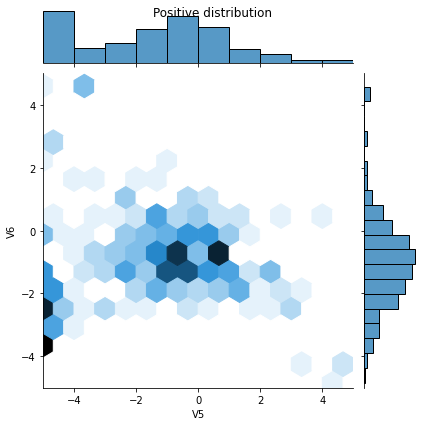

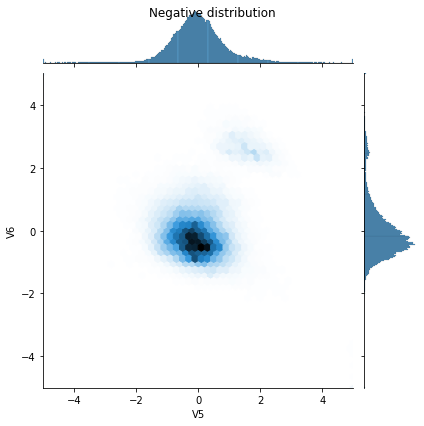

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

pos_df = pd.DataFrame(
    train_features[bool_train_labels],
    columns=train_df.columns,
)
neg_df = pd.DataFrame(
    train_features[~bool_train_labels],
    columns=train_df.columns,
)

sns.jointplot(
    x=pos_df["V5"],
    y=pos_df["V6"],
    kind="hex",
    xlim=(-5, 5),
    ylim=(-5, 5),
)
plt.suptitle("Positive distribution")

sns.jointplot(
    x=neg_df["V5"],
    y=neg_df["V6"],
    kind="hex",
    xlim=(-5, 5),
    ylim=(-5, 5),
)
_ = plt.suptitle("Negative distribution")

Definición del modelo y métricas
---

In [16]:
METRICS = [
    tf.keras.metrics.TruePositives(name="tp"),
    tf.keras.metrics.FalsePositives(name="fp"),
    tf.keras.metrics.TrueNegatives(name="tn"),
    tf.keras.metrics.FalseNegatives(name="fn"),
    tf.keras.metrics.BinaryAccuracy(name="accuracy"),
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name="recall"),
    tf.keras.metrics.AUC(name="auc"),
    tf.keras.metrics.AUC(name="prc", curve="PR"),
]


def make_model(metrics=METRICS, output_bias=None):

    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)

    model = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(
                16,
                activation="relu",
                input_shape=(train_features.shape[-1],),
            ),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(
                1,
                activation="sigmoid",
                bias_initializer=output_bias,
            ),
        ]
    )

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=1e-3,
        ),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=metrics,
    )

    return model

Modelo base
---

**Especificación del modelo**

In [17]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_prc",
    verbose=1,
    patience=10,
    mode="max",
    restore_best_weights=True,
)

In [18]:
model = make_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                480       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.predict(train_features[:10])

array([[0.92726827],
       [0.7600892 ],
       [0.637135  ],
       [0.72065616],
       [0.9366363 ],
       [0.64589524],
       [0.8285974 ],
       [0.68659854],
       [0.95712185],
       [0.78084993]], dtype=float32)

**Bias inicial**

In [21]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 1.4742


$$ p_0 = pos/(pos + neg) = 1/(1+e^{-b_0}) $$
$$ b_0 = -log_e(1/p_0 - 1) $$
$$ b_0 = log_e(pos/neg)$$

In [22]:
initial_bias = np.log([pos / neg])
initial_bias

array([-6.35935934])

In [23]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.00348756],
       [0.00819331],
       [0.00083524],
       [0.01507092],
       [0.00331992],
       [0.00200653],
       [0.00271955],
       [0.0022147 ],
       [0.00216374],
       [0.00082248]], dtype=float32)

In [24]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.0140


**Almacenamiento de los pesos iniciales**

In [27]:
import tempfile

initial_weights = os.path.join(tempfile.mkdtemp(), "initial_weights")
model.save_weights(initial_weights)

**Chequeo del ajuste del bias**

### Understanding useful metrics

Notice that there are a few metrics defined above that can be computed by the model that will be helpful when evaluating the performance.



*   **False** negatives and **false** positives are samples that were **incorrectly** classified
*   **True** negatives and **true** positives are samples that were **correctly** classified
*   **Accuracy** is the percentage of examples correctly classified
>   $\frac{\text{true samples}}{\text{total samples}}$
*   **Precision** is the percentage of **predicted** positives that were correctly classified
>   $\frac{\text{true positives}}{\text{true positives + false positives}}$
*   **Recall** is the percentage of **actual** positives that were correctly classified
>   $\frac{\text{true positives}}{\text{true positives + false negatives}}$
*   **AUC** refers to the Area Under the Curve of a Receiver Operating Characteristic curve (ROC-AUC). This metric is equal to the probability that a classifier will rank a random positive sample higher than a random negative sample.
*   **AUPRC** refers to Area Under the Curve of the Precision-Recall Curve. This metric computes precision-recall pairs for different probability thresholds. 

Note: Accuracy is not a helpful metric for this task. You can have 99.8%+ accuracy on this task by predicting False all the time.  

Read more:
*  [True vs. False and Positive vs. Negative](https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative)
*  [Accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy)
*   [Precision and Recall](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)
*   [ROC-AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)
*   [Relationship between Precision-Recall and ROC Curves](https://www.biostat.wisc.edu/~page/rocpr.pdf)

In [28]:
model = make_model()

model.load_weights(initial_weights)

model.layers[-1].bias.assign([0.0])

zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels),
    verbose=0,
)

In [29]:
model = make_model()

model.load_weights(initial_weights)

careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels),
    verbose=0,
)

In [30]:
def plot_loss(history, label, n):

    plt.semilogy(
        history.epoch,
        history.history["loss"],
        color=colors[n],
        label="Train " + label,
    )
    plt.semilogy(
        history.epoch,
        history.history["val_loss"],
        color=colors[n],
        label="Val " + label,
        linestyle="--",
    )
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

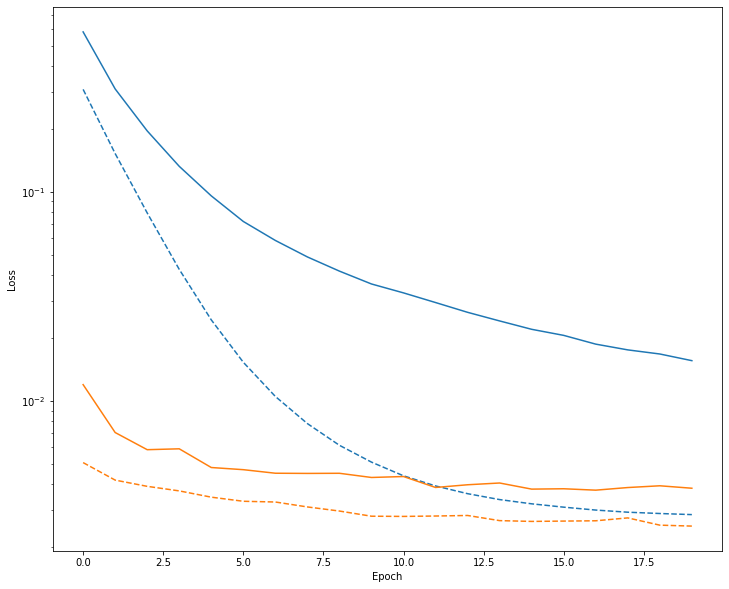

In [35]:
plot_loss(
    zero_bias_history,
    "Zero Bias",
    0,
)

plot_loss(
    careful_bias_history,
    "Careful Bias",
    1,
)

**Entranamiento del modelo**

In [39]:
model = make_model()

model.load_weights(initial_weights)

baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    verbose=0,
)

Restoring model weights from the end of the best epoch: 28.
Epoch 38: early stopping


**Evolución de las Métricas**

In [40]:
def plot_metrics(history):

    metrics = [
        "loss",
        "prc",
        "precision",
        "recall",
    ]

    for n, metric in enumerate(metrics):

        name = metric.replace("_", " ").capitalize()
        plt.subplot(2, 2, n + 1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label="Train")
        plt.plot(
            history.epoch,
            history.history["val_" + metric],
            color=colors[0],
            linestyle="--",
            label="Val",
        )
        plt.xlabel("Epoch")
        plt.ylabel(name)
        if metric == "loss":
            plt.ylim([0, plt.ylim()[1]])
        elif metric == "auc":
            plt.ylim([0.8, 1])
        else:
            plt.ylim([0, 1])

        plt.legend();

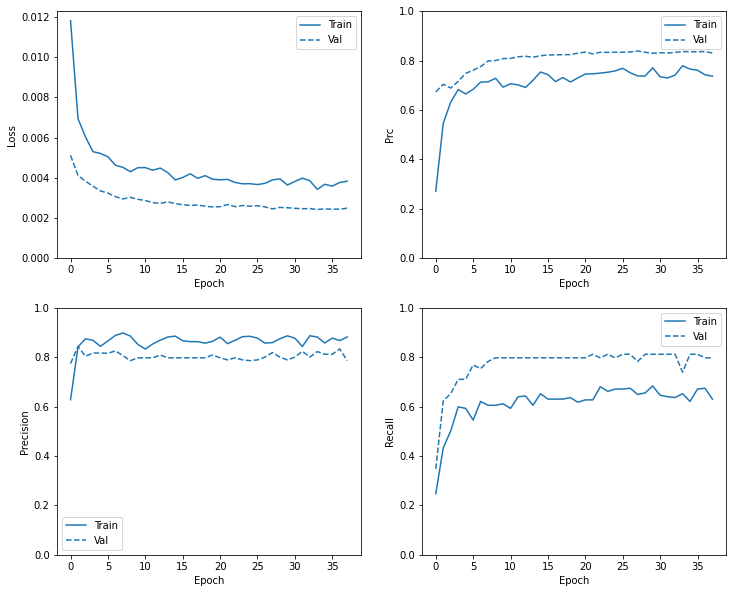

In [41]:
plot_metrics(baseline_history)

**Evaluación de las métricas**

In [42]:
from sklearn.metrics import confusion_matrix

train_predictions_baseline = model.predict(
    train_features,
    batch_size=BATCH_SIZE,
)

test_predictions_baseline = model.predict(
    test_features,
    batch_size=BATCH_SIZE,
)

In [43]:
def plot_cm(labels, predictions, p=0.5):

    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title("Confusion matrix @{:.2f}".format(p))
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")

    print("Legitimate Transactions Detected (True Negatives): ", cm[0][0])
    print("Legitimate Transactions Incorrectly Detected (False Positives): ", cm[0][1])
    print("Fraudulent Transactions Missed (False Negatives): ", cm[1][0])
    print("Fraudulent Transactions Detected (True Positives): ", cm[1][1])
    print("Total Fraudulent Transactions: ", np.sum(cm[1]))

loss :  0.003476402023807168
tp :  80.0
fp :  8.0
tn :  56850.0
fn :  24.0
accuracy :  0.9994382262229919
precision :  0.9090909361839294
recall :  0.7692307829856873
auc :  0.9226981401443481
prc :  0.7967866659164429

Legitimate Transactions Detected (True Negatives):  56850
Legitimate Transactions Incorrectly Detected (False Positives):  8
Fraudulent Transactions Missed (False Negatives):  24
Fraudulent Transactions Detected (True Positives):  80
Total Fraudulent Transactions:  104


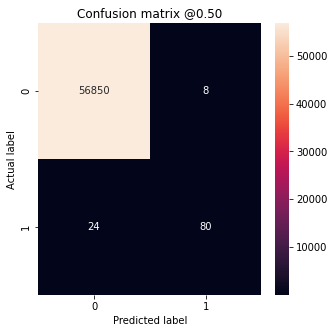

In [44]:
baseline_results = model.evaluate(
    test_features, test_labels, batch_size=BATCH_SIZE, verbose=0
)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ": ", value)
print()

plot_cm(test_labels, test_predictions_baseline)

**Gráfica ROC**

In [49]:
from sklearn.metrics import roc_curve


def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = roc_curve(labels, predictions)

    plt.plot(100 * fp, 100 * tp, label=name, linewidth=2, **kwargs)
    plt.xlabel("False positives [%]")
    plt.ylabel("True positives [%]")
    plt.xlim([-0.5, 20])
    plt.ylim([80, 100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect("equal")

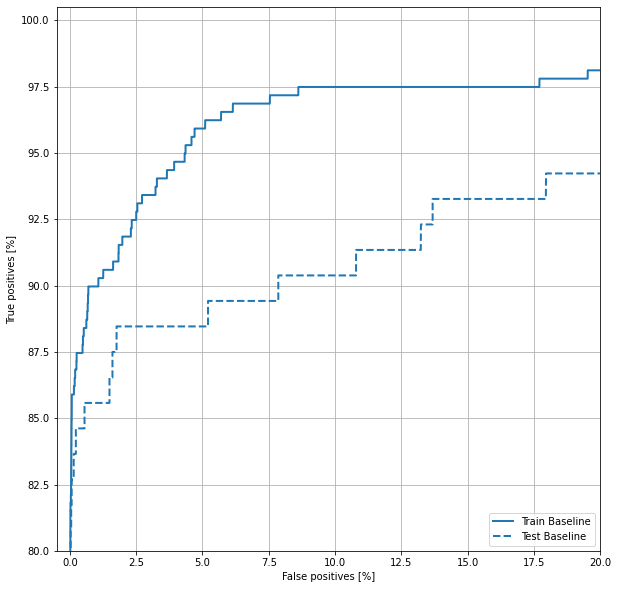

In [50]:
plot_roc(
    "Train Baseline",
    train_labels,
    train_predictions_baseline,
    color=colors[0],
)

plot_roc(
    "Test Baseline",
    test_labels,
    test_predictions_baseline,
    color=colors[0],
    linestyle="--",
)

plt.legend(loc="lower right");

**Gráfica de la curva AUPRC**

In [51]:
from sklearn.metrics import precision_recall_curve


def plot_prc(name, labels, predictions, **kwargs):

    precision, recall, _ = precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect("equal")

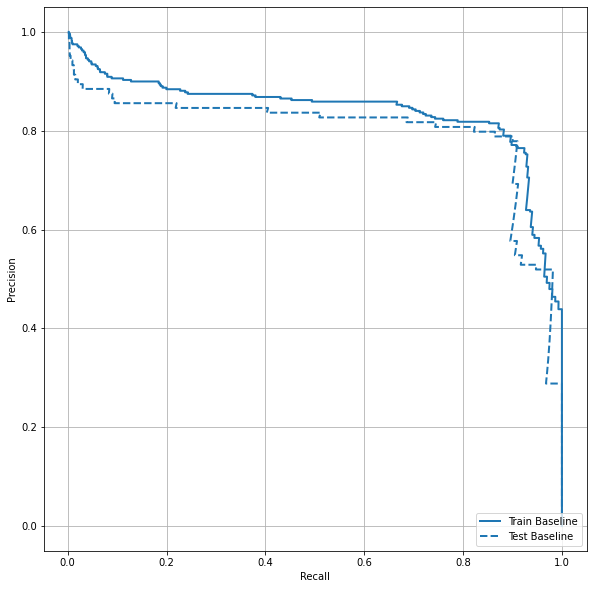

In [52]:
plot_prc(
    "Train Baseline",
    train_labels,
    train_predictions_baseline,
    color=colors[0],
)

plot_prc(
    "Test Baseline",
    test_labels,
    test_predictions_baseline,
    color=colors[0],
    linestyle="--",
)

plt.legend(loc="lower right");

Pesos por clase
--

**Pesos por clase**

In [53]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print("Weight for class 0: {:.2f}".format(weight_for_0))
print("Weight for class 1: {:.2f}".format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 289.44


**Entrenamiento del modelo por pesos por clase**

In [55]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    class_weight=class_weight,
    verbose=0,
)

Restoring model weights from the end of the best epoch: 2.
Epoch 12: early stopping


**Historia**

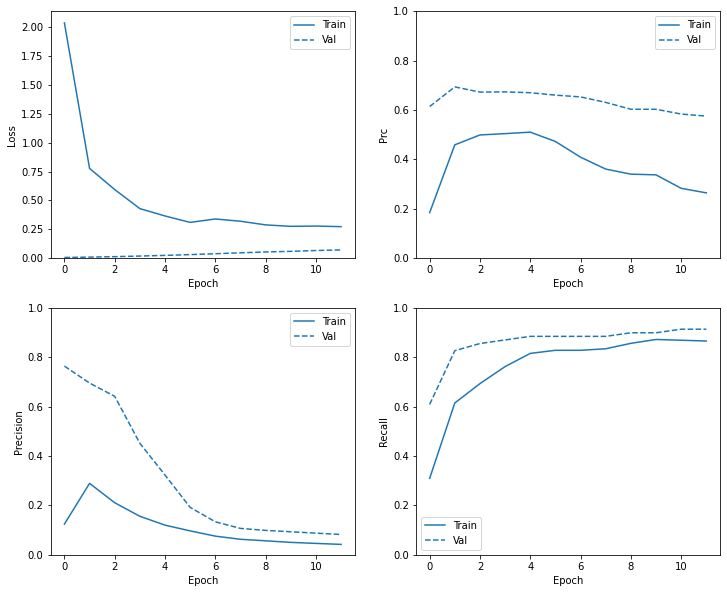

In [56]:
plot_metrics(weighted_history)

**Evaluación de métricas**

In [57]:
train_predictions_weighted = weighted_model.predict(
    train_features,
    batch_size=BATCH_SIZE,
)

test_predictions_weighted = weighted_model.predict(
    test_features,
    batch_size=BATCH_SIZE,
)

loss :  0.00996446330100298
tp :  81.0
fp :  22.0
tn :  56836.0
fn :  23.0
accuracy :  0.999210000038147
precision :  0.7864077687263489
recall :  0.7788461446762085
auc :  0.9494943022727966
prc :  0.6816491484642029

Legitimate Transactions Detected (True Negatives):  56836
Legitimate Transactions Incorrectly Detected (False Positives):  22
Fraudulent Transactions Missed (False Negatives):  23
Fraudulent Transactions Detected (True Positives):  81
Total Fraudulent Transactions:  104


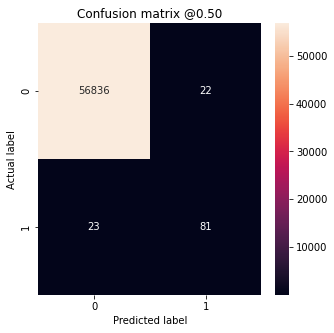

In [58]:
weighted_results = weighted_model.evaluate(
    test_features,
    test_labels,
    batch_size=BATCH_SIZE,
    verbose=0,
)

for name, value in zip(weighted_model.metrics_names, weighted_results):
    print(name, ": ", value)
print()

plot_cm(
    test_labels,
    test_predictions_weighted,
)

**Curva ROC**

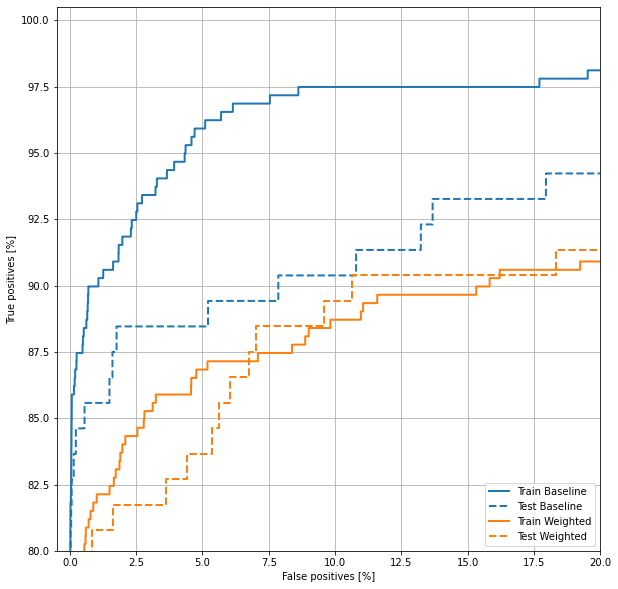

In [59]:
plot_roc(
    "Train Baseline",
    train_labels,
    train_predictions_baseline,
    color=colors[0],
)

plot_roc(
    "Test Baseline",
    test_labels,
    test_predictions_baseline,
    color=colors[0],
    linestyle="--",
)

plot_roc(
    "Train Weighted",
    train_labels,
    train_predictions_weighted,
    color=colors[1],
)

plot_roc(
    "Test Weighted",
    test_labels,
    test_predictions_weighted,
    color=colors[1],
    linestyle="--",
)


plt.legend(loc="lower right");

**Curva AUPRC**

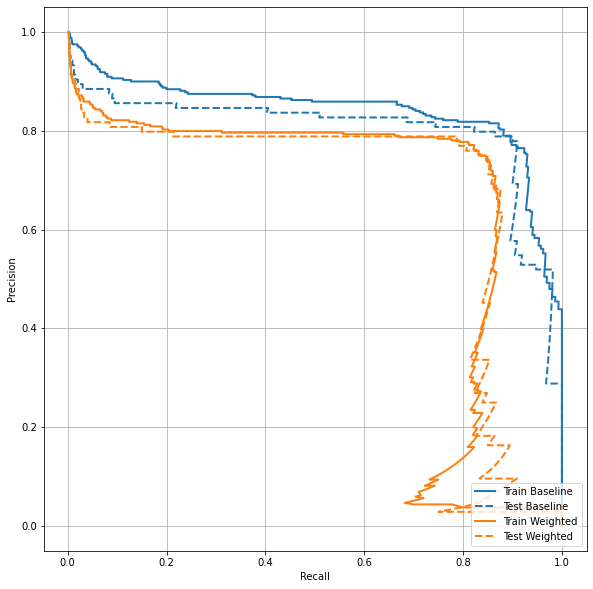

In [60]:
plot_prc(
    "Train Baseline",
    train_labels,
    train_predictions_baseline,
    color=colors[0],
)

plot_prc(
    "Test Baseline",
    test_labels,
    test_predictions_baseline,
    color=colors[0],
    linestyle="--",
)

plot_prc(
    "Train Weighted",
    train_labels,
    train_predictions_weighted,
    color=colors[1],
)

plot_prc(
    "Test Weighted",
    test_labels,
    test_predictions_weighted,
    color=colors[1],
    linestyle="--",
)


plt.legend(loc="lower right");

Sobremuestreo
--

**Sobremuestreo de la clase minoritaria**

In [61]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [62]:
#
# Usando NumPy
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(181957, 29)

In [63]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(363914, 29)

In [64]:
#
# Usando tf.data
#
BUFFER_SIZE = 100000


def make_ds(features, labels):
    ds = tf.data.Dataset.from_tensor_slices((features, labels))  # .cache()
    ds = ds.shuffle(BUFFER_SIZE).repeat()
    return ds


pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [65]:
for features, label in pos_ds.take(1):
    print("Features:\n", features.numpy())
    print()
    print("Label: ", label.numpy())

Features:
 [ 0.4638527   0.80860165 -2.95934741  2.29071554 -0.3041107  -0.57503103
 -2.04323048  0.58716249 -0.42691556 -4.18046052  3.53650541 -3.16840414
 -0.40229131 -5.         -1.76708737 -2.72834188 -3.04003887  0.11026936
  0.12031048  0.57886309  0.80179274  0.81934791 -0.39858282  0.53962238
  1.08000332 -0.53413989  1.62958564  0.9519011   0.63101885]

Label:  1


In [66]:
resampled_ds = tf.data.Dataset.sample_from_datasets(
    [pos_ds, neg_ds], weights=[0.5, 0.5]
)
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [67]:
for features, label in resampled_ds.take(1):
    print(label.numpy().mean())

0.48779296875


In [68]:
resampled_steps_per_epoch = np.ceil(2.0 * neg / BATCH_SIZE)
resampled_steps_per_epoch

278.0

**Entrenamiento con la muestra**

In [69]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

output_layer = resampled_model.layers[-1]
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2)

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds,
    verbose=0,
)

Epoch 1/100
278/278 [==============================] - 47s 158ms/step - loss: 0.4134 - tp: 248573.0000 - fp: 82542.0000 - tn: 259138.0000 - fn: 36053.0000 - accuracy: 0.8106 - precision: 0.7507 - recall: 0.8733 - auc: 0.9192 - prc: 0.9299 - val_loss: 0.2543 - val_tp: 63.0000 - val_fp: 1244.0000 - val_tn: 44256.0000 - val_fn: 6.0000 - val_accuracy: 0.9726 - val_precision: 0.0482 - val_recall: 0.9130 - val_auc: 0.9838 - val_prc: 0.7208
Epoch 2/100
278/278 [==============================] - 41s 150ms/step - loss: 0.2119 - tp: 260722.0000 - fp: 18756.0000 - tn: 265614.0000 - fn: 24252.0000 - accuracy: 0.9245 - precision: 0.9329 - recall: 0.9149 - auc: 0.9719 - prc: 0.9784 - val_loss: 0.1350 - val_tp: 63.0000 - val_fp: 892.0000 - val_tn: 44608.0000 - val_fn: 6.0000 - val_accuracy: 0.9803 - val_precision: 0.0660 - val_recall: 0.9130 - val_auc: 0.9922 - val_prc: 0.6912
Epoch 3/100
278/278 [==============================] - 42s 152ms/step - loss: 0.1606 - tp: 263261.0000 - fp: 11132.0000 - tn:

**Chequeo**

In [ ]:
plot_metrics(resampled_history)

**Re-entrenamiento**

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1]
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10 * EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds),
)

**Chequeo**

In [ ]:
plot_metrics(resampled_history)

**Evaluación de métricas**

In [ ]:
train_predictions_resampled = resampled_model.predict(
    train_features, batch_size=BATCH_SIZE
)
test_predictions_resampled = resampled_model.predict(
    test_features, batch_size=BATCH_SIZE
)

In [ ]:
resampled_results = resampled_model.evaluate(
    test_features, test_labels, batch_size=BATCH_SIZE, verbose=0
)
for name, value in zip(resampled_model.metrics_names, resampled_results):
    print(name, ": ", value)
print()

plot_cm(test_labels, test_predictions_resampled)

**Curva ROC**

In [ ]:
plot_roc(
    "Train Baseline",
    train_labels,
    train_predictions_baseline,
    color=colors[0],
)

plot_roc(
    "Test Baseline",
    test_labels,
    test_predictions_baseline,
    color=colors[0],
    linestyle="--",
)

plot_roc(
    "Train Weighted",
    train_labels,
    train_predictions_weighted,
    color=colors[1],
)

plot_roc(
    "Test Weighted",
    test_labels,
    test_predictions_weighted,
    color=colors[1],
    linestyle="--",
)

plot_roc(
    "Train Resampled",
    train_labels,
    train_predictions_resampled,
    color=colors[2],
)

plot_roc(
    "Test Resampled",
    test_labels,
    test_predictions_resampled,
    color=colors[2],
    linestyle="--",
)

plt.legend(loc="lower right");

**Curva Plot the AUPRC**

In [ ]:
plot_prc(
    "Train Baseline",
    train_labels,
    train_predictions_baseline,
    color=colors[0],
)

plot_prc(
    "Test Baseline",
    test_labels,
    test_predictions_baseline,
    color=colors[0],
    linestyle="--",
)

plot_prc(
    "Train Weighted",
    train_labels,
    train_predictions_weighted,
    color=colors[1],
)

plot_prc(
    "Test Weighted",
    test_labels,
    test_predictions_weighted,
    color=colors[1],
    linestyle="--",
)

plot_prc(
    "Train Resampled",
    train_labels,
    train_predictions_resampled,
    color=colors[2],
)

plot_prc(
    "Test Resampled",
    test_labels,
    test_predictions_resampled,
    color=colors[2],
    linestyle="--",
)

plt.legend(loc="lower right");